In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns
import math
%matplotlib inline

In [2]:
#直线方程函数
def f_1(x, A, B):
    return A*x + B

#二次曲线方程
def f_2(x, A, B, C):
    return A*x*x + B*x + C

#三次曲线方程
def f_3(x, A, B, C, D):
    return A*x*x*x + B*x*x + C*x + D


def f_gauss(x, A, B, C, sigma):
    return A*np.exp(-(x-B)**2/(2*sigma**2)) + C



In [3]:
def plot_param(x0,y0,title):
  
    #绘制散点
    fig, ax = plt.subplots(figsize=(11.8, 8))
    #plt.rc('text', usetex=False)
    #plt.scatter(x0[:], y0[:], 25, "red")
#直线拟合与绘制
    A1, B1 = optimize.curve_fit(f_1, x0, y0)[0]
    print(A1,B1)
    x1 = np.arange(0, 1.1, 0.1)
    y1 = A1*x1 + B1
    plt.plot(x1, y1, "black",label="1-order")
    eq1 = r"y="+ str(round(A1,4))+"*x+" + str(round(B1,4))
    plt.text(80, 4600, eq1, fontsize=15)
    plt.scatter(x0, y0, marker='^', c="black",label=title,alpha=0.2)

    #二次曲线拟合与绘制
    A2, B2, C2 = optimize.curve_fit(f_2, x0, y0)[0]
    print(A2,B2,C2)
    x2 = np.arange(0, 1.1, 0.1)
    y2 = A2*x2*x2 + B2*x2 + C2
    plt.plot(x2, y2, "green",label="2-order")
    eq2 = r"y="+str(round(A2,4))+"*x$^{2}$+" + str(round(B2,4))+"*x+" + str(round(C2,4))
    plt.text(80, 4300, eq2, fontsize=15)
    #plt.scatter(x, y, marker='^', c="green",label="2-order",alpha=0.2)

    #三次曲线拟合与绘制
    A3, B3, C3, D3= optimize.curve_fit(f_3, x0, y0)[0]
    print(A3,B3,C3,D3)
    x3 = np.arange(0, 1.1, 0.1)
    y3 = A3*x3*x3*x3 + B3*x3*x3 + C3*x3 + D3
    plt.plot(x3, y3, "blue",label="3-order")
    eq3 = r"y="+str(round(A2,4))+"*x$^{3}$" + str(round(B3,4))+"*x$^{2}$+" + str(round(C3,4))+"*x+" + str(round(D3,4))
    plt.text(80, 4000, eq3, fontsize=15)
    #plt.scatter(x3, y3, marker='^', c="blue",label="3-order",alpha=0.2)
    #plt.plot(x3, y3, "purple")
    A4, B4, C4, D4= optimize.curve_fit(f_gauss, x0, y0)[0]
    print(A4,B4,C4,D4)
    x4 = np.arange(0, 1.1, 0.1)
    y4 = A4*np.exp(-(x4-B4)**2/(2*D4**2)) + C4
    plt.plot(x4, y4, "cyan",label="gauss")
    #plt.plot(x4, y4, "red")
  
    plt.title(title)
    plt.xlabel('SS')
    plt.ylabel('CCN $(cm^{-3})$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    return fig,ax

In [4]:
df= pd.read_csv('NUIST_CCN_ave2.csv')

In [5]:
df.head()

,labels,Date_BJC,CCN_Number_Conc,Current_SS,Time
0,1,2013-06-03 12:00:00,9278.47,1.0,2019-04-08 12:00:32
1,2,2013-06-03 12:00:00,1096.45,0.1,2019-04-08 12:08:36
2,3,2013-06-03 12:00:00,4427.10,0.2,2019-04-08 12:18:37
3,4,2013-06-03 12:00:00,4550.87,0.3,2019-04-08 12:23:37
4,5,2013-06-03 12:00:00,5400.61,0.4,2019-04-08 12:28:37


In [6]:
df=df.dropna(subset=['Current_SS', 'CCN_Number_Conc'])

In [7]:
x0=df['Current_SS']
y0=df['CCN_Number_Conc']

6083.806496935586 2108.968097067892
-3958.172219676757 10391.289714534782 1272.0486076382977
13278.97749507997 -25772.359255340685 20363.510051095844 176.1025824959355
12115288.731059393 1.3124949893672166 -12107196.84187284 39.11245590347432


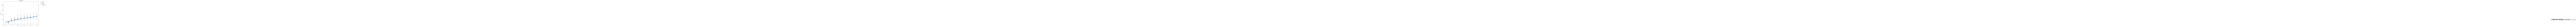

(<Figure size 849.6x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x206c42c9f60>)

In [8]:
plot_param(x0,y0,"all_regression")